In [190]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import *
from matplotlib import colors
from matplotlib.colors import ListedColormap
from argparse import Namespace
from pymoo.indicators.hv import HV
from pymoo.config import Config
Config.warnings['not_compiled'] = False



In [191]:
conf = !python  parameters.py

In [192]:
configs = eval(conf[0])
configs.et_normalize_coef_cost

100

In [194]:
## ESPECIFIC CONFIGS
configs.name="E999_9"
configs.n_devices=999
configs.n_jobs=9

In [195]:
# df = pd.read_pickle('logs/log_rnd_alloc_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.read_pickle('logs/log_eval_PF_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.DataFrame(df)

In [196]:

df.columns = ["model","sample","time","cost","reward","iTime","iCost"]
df.head()

,model,sample,time,cost,reward,iTime,iCost
0,010,0,1025.00,725.0,-1321.666667,495.00,1620.0
1,010,1,1221.75,655.0,-1298.333333,396.75,1620.0
2,010,2,1096.25,720.0,-1320.000000,471.25,1620.0
3,010,3,1268.25,725.0,-1321.666667,363.25,1620.0
4,010,4,1212.50,630.0,-1290.000000,497.50,1620.0


# DRL - average all samples (NOT VALID)

In [197]:
dfmodel = df.groupby("model").agg({"time":mean,"cost":mean})
dfmodel

,time,cost
model,,
010,1159.344971,703.000000
100,2276.645020,1628.699951
19,991.244995,604.000000
28,714.945007,410.399994
37,749.044983,603.299988
46,730.445007,534.400024
55,735.544983,575.099976
64,841.844971,664.799988
73,726.445007,664.299988


In [198]:
print(type(dfmodel))


<class 'pandas.core.frame.DataFrame'>


In [199]:
for i in range(len(dfmodel)):
    print(dfmodel.iloc[i].name)
    print(dfmodel.iloc[i].time)
    

010
1159.345
100
2276.645
19
991.245
28
714.945
37
749.045
46
730.445
55
735.545
64
841.845
73
726.445
82
733.045
91
730.745


In [226]:
def getWeithDecomposition(val):
    if len(val)==3:
        if val[0]==0:
            return "(0,1)"
        else:
            return "(1,0)"
    else:
        return "(%s,%s)"%(val[0],val[1])
    

010
100
19
28
37
46
55
64
73
82
91


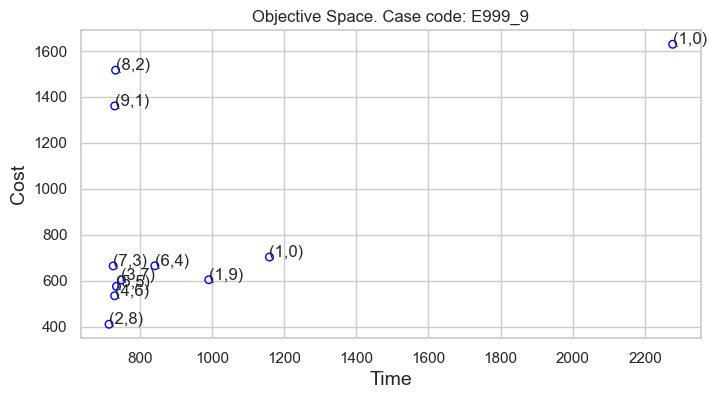

In [227]:
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(dfmodel.time, dfmodel.cost, s=30, facecolors='none', edgecolors='blue')


for i in range(len(dfmodel)):
    ax.annotate(getWeithDecomposition(dfmodel.iloc[i].name), (dfmodel.iloc[i].time, dfmodel.iloc[i].cost))

plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [203]:
avg_pf = np.vstack((dfmodel.time.values,dfmodel.cost.values)).T
avg_pf.shape

(11, 2)

In [204]:
avg_pf

array([[1159.345,  703.   ],
       [2276.645, 1628.7  ],
       [ 991.245,  604.   ],
       [ 714.945,  410.4  ],
       [ 749.045,  603.3  ],
       [ 730.445,  534.4  ],
       [ 735.545,  575.1  ],
       [ 841.845,  664.8  ],
       [ 726.445,  664.3  ],
       [ 733.045, 1515.8  ],
       [ 730.745, 1360.3  ]], dtype=float32)

In [205]:
ref_point = np.array([500., 900.])
ind = HV(ref_point=ref_point)
print("HV", ind(avg_pf)) 

HV 0.0


# DRL one sample

In [220]:
# df = pd.read_pickle('logs/log_rnd_alloc_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.read_pickle('logs/log_eval_PF_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.DataFrame(df)
df.columns = ["model","case","time","cost","reward","iTime","iCost"]
df.head()


,model,case,time,cost,reward,iTime,iCost
0,5050,0,720.00,630.0,-1005.000000,495.00,1620.0
1,5050,1,751.75,560.0,-1009.208333,396.75,1620.0
2,5050,2,801.25,540.0,-1030.625000,471.25,1620.0
3,5050,3,728.25,540.0,-994.125000,363.25,1620.0
4,5050,4,722.50,540.0,-991.250000,497.50,1620.0


In [221]:
dfDRL = df[df.case==0]
dfDRL

,model,case,time,cost,reward,iTime,iCost
0,5050,0,720.0,630.0,-1005.000000,495.0,1620.0
50,2575,0,935.0,840.0,-1253.750000,495.0,1620.0
100,0100,0,2325.0,685.0,-1308.333333,495.0,1620.0


In [241]:
avg_pf = np.vstack((dfDRL.time.values,dfDRL.cost.values)).T
avg_pf

array([[ 720.,  630.],
       [ 935.,  840.],
       [2325.,  685.]], dtype=float32)

In [239]:
def getWeithDecomposition(val):
    print(val)
    if val[0]=="0":
        return "(0,1.)"
    elif val[0]=="1":
        return "(1.,0)"
    return "(%s,%s)"%(float(val[0:2])/100,float(val[2:])/100)

2325.0

(720.0, 630.0)
5050
(935.0, 840.0)
2575
(2325.0, 685.0)
0100


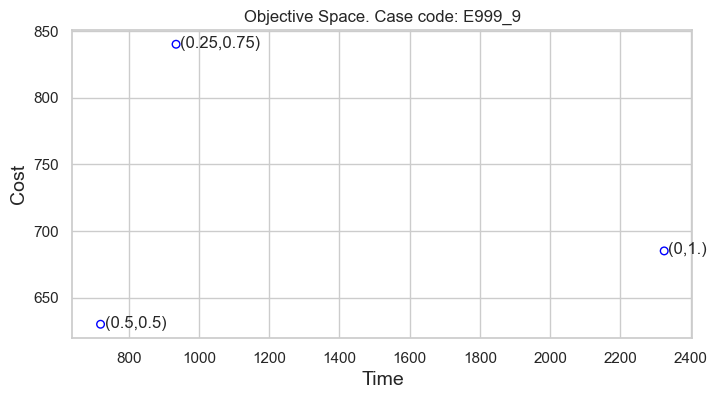

In [258]:
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(avg_pf[:,0], avg_pf[:,1], s=30, facecolors='none', edgecolors='blue')


for i in range(len(avg_pf)):
    print((avg_pf[i,0], avg_pf[i,1]))
    ax.annotate(getWeithDecomposition(dfDRL.iloc[i].model), (avg_pf[i,0]+12, avg_pf[i,1]-2.5))

plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

# GA

In [215]:
# df = pd.read_pickle('logs/log_rnd_alloc_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')

df = pd.read_pickle('logs/log_ga_pf_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'_0.pkl', 'infer')
# df = pd.read_pickle('logs/log_ga_pf_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.DataFrame(df)



In [216]:
df.columns = ["case","time","cost","executionTime"]
df.head()

,case,time,cost,executionTime
0,0,1145.0,720.0,2023.254134
1,0,930.0,875.0,2023.254134
2,0,960.0,845.0,2023.254134
3,0,1045.0,755.0,2023.254134
4,0,1165.0,705.0,2023.254134


In [217]:
dfga = df[df.case==0]
dfga

,case,time,cost,executionTime
0,0,1145.0,720.0,2023.254134
1,0,930.0,875.0,2023.254134
2,0,960.0,845.0,2023.254134
3,0,1045.0,755.0,2023.254134
4,0,1165.0,705.0,2023.254134
5,0,915.0,900.0,2023.254134
6,0,1005.0,790.0,2023.254134
7,0,1000.0,800.0,2023.254134
8,0,1110.0,730.0,2023.254134
9,0,1115.0,725.0,2023.254134


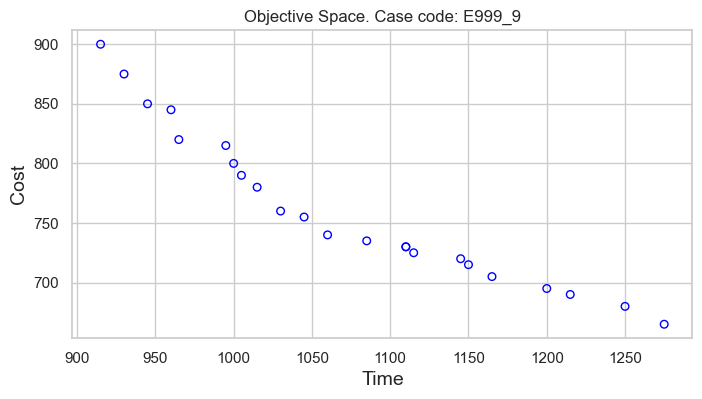

In [218]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(dfga.time, dfga.cost, s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

# GA + DRL

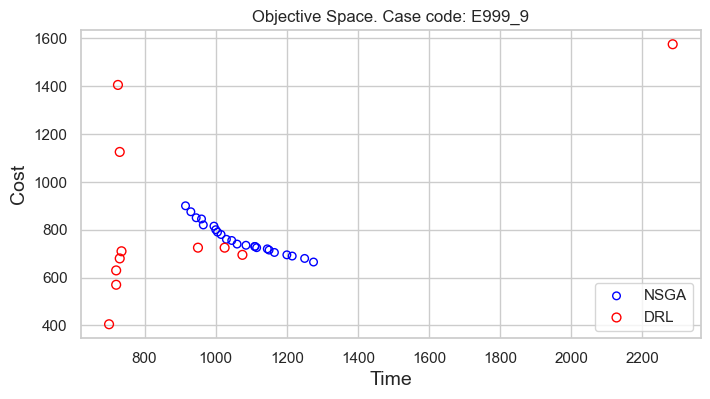

In [219]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(dfga.time, dfga.cost, s=30, facecolors='none', edgecolors='blue',label="NSGA")

ax.scatter(avg_pf[:,0], avg_pf[:,1], s=40, facecolors='none', edgecolors='red',label="DRL")

plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.legend()
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [116]:
ga_pf = np.vstack((dfga.time.values,dfga.cost.values)).T

In [117]:
ref_point = np.array([900., 900.])
ind = HV(ref_point=ref_point)
print("H - GA ", ind(ga_pf)) 

H - GA  133672.0859375


In [119]:
print("H - DRL ", ind(avg_pf)) 

H - DRL  601077.7541656494


### Violin plot del PF según pesos del modelo DRL

In [134]:
dtvio = dfDRL.loc[:,["model","time","cost"]]
dtvio["case"]=np.zeros(len(dtvio),dtype=int)
dtvio

,model,time,cost,case
0,010,166.083328,81.0,0
50,19,248.666672,81.0,0
100,28,171.250015,81.0,0
150,37,363.916656,145.0,0
200,46,203.916672,81.0,0
250,55,259.916656,114.0,0
300,64,324.416656,190.0,0
350,73,183.000015,97.0,0
400,82,279.499969,178.0,0
450,91,326.899994,810.0,0


In [135]:
x = list(range(len(dtvio)))

In [169]:
def getWeithDecomposition(val):
    if len(val)==3:
        if val[0]=="0":
            return "(0,1.)"
        else:
            return "(1.,0)"
    else:
        return "(.%s,.%s)"%(val[0],val[1])
    
fticks = np.vectorize(getWeithDecomposition)
ticks = fticks(dtvio.model)
ticks

array(['(0,1.)', '(.1,.9)', '(.2,.8)', '(.3,.7)', '(.4,.6)', '(.5,.5)',
       '(.6,.4)', '(.7,.3)', '(.8,.2)', '(.9,.1)', '(1.,0)'], dtype='<U7')

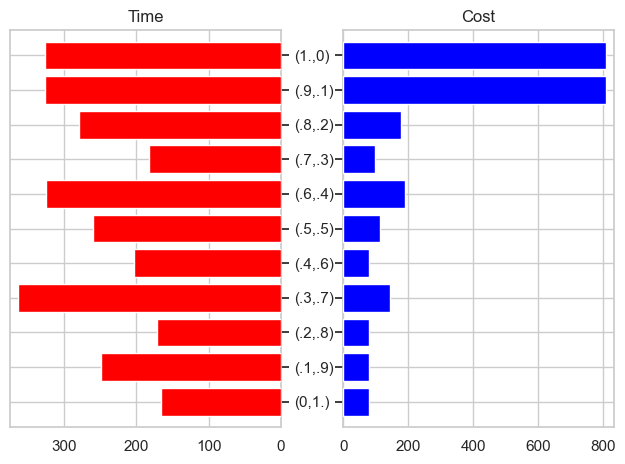

In [174]:
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(x, dtvio.time, align='center', color='red', zorder=10)
axes[0].set(title='Time')
axes[1].barh(x, dtvio.cost, align='center', color='blue', zorder=10)
axes[1].set(title='Cost')

axes[0].invert_xaxis()
axes[0].set(yticks=x, yticklabels=ticks)
axes[0].yaxis.tick_right()
axes[1].yaxis.tick_left()



for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.23)
plt.show()

In [185]:
dtvio.model

0      010
50      19
100     28
150     37
200     46
250     55
300     64
350     73
400     82
450     91
500    100
Name: model, dtype: object

In [186]:
dfmodel #average DRL all cases
print(dfmodel.index)

Index(['010', '100', '19', '28', '37', '46', '55', '64', '73', '82', '91'], dtype='object', name='model')

In [188]:
dfrindex = dfmodel.reindex(['010', '19', '28', '37', '46', '55', '64', '73', '82', '91', '100'])

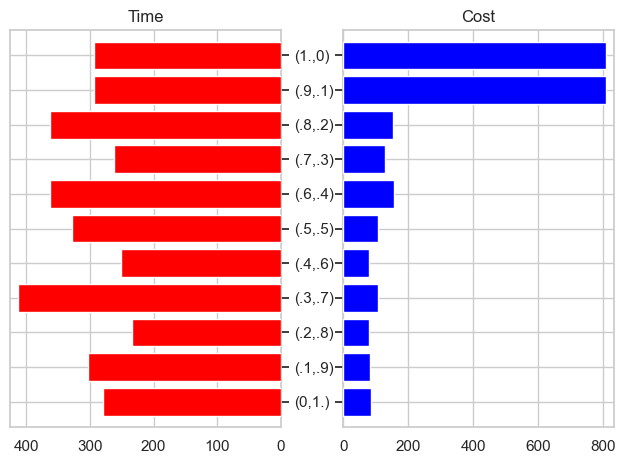

In [189]:
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(x, dfrindex.time, align='center', color='red', zorder=10)
axes[0].set(title='Time')
axes[1].barh(x, dfrindex.cost, align='center', color='blue', zorder=10)
axes[1].set(title='Cost')

axes[0].invert_xaxis()
axes[0].set(yticks=x, yticklabels=ticks)
axes[0].yaxis.tick_right()
axes[1].yaxis.tick_left()



for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.23)
plt.show()